In [1]:
from rdflib import Graph, URIRef, Literal
from rdflib.namespace import XSD, RDF, RDFS
from shortid import ShortId

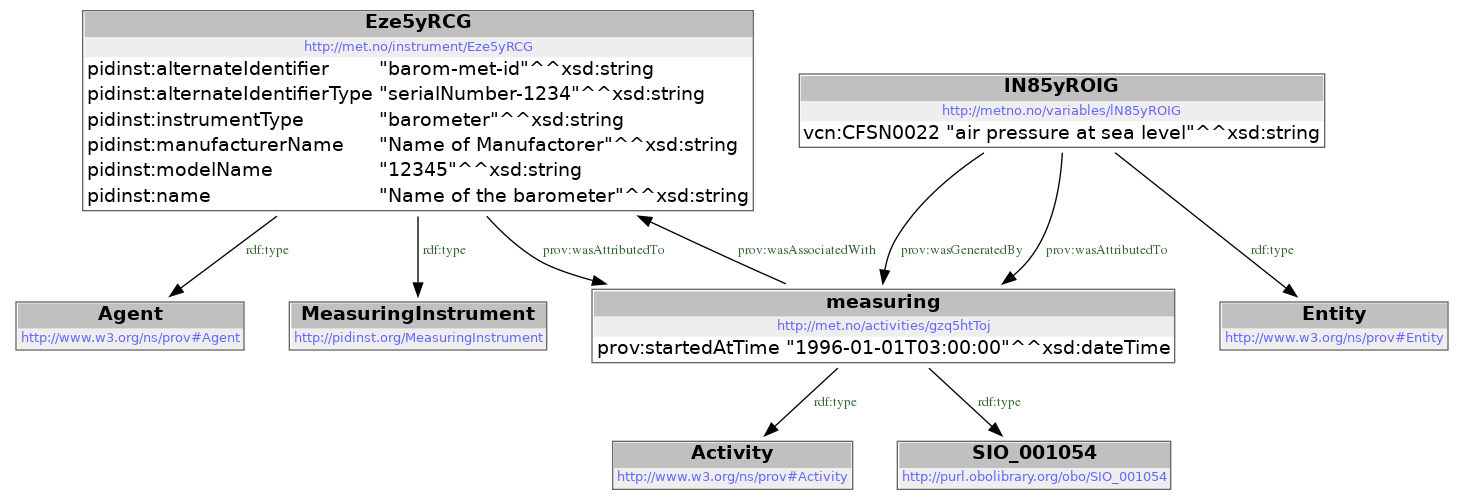

In [5]:
#Specific Weather station steps 
#instrument/measures/parameter
#logger/records/observation
#Iridium/sends/data
#Obsinn/converts to kvalobsformat/data
#Kvalobs/controls/data
#kdvh/stores/data

sid = ShortId()

g = Graph()

#define namespace
g.bind('metno', 'http://met.no/')
g.bind('obo', 'http://purl.obolibrary.org/obo/')
g.bind('sio','http://semanticscience.org/resource/')
g.bind('pidinst', 'http://pidinst.org/')
#nerc ontology
g.bind('vcn', 'http://vocab.nerc.ac.uk/collection/P07/current/')
#sweet ontology prop pressure
#g.bind('sopropp','http://sweetontology.net/propPressure/')

g.bind('prov', 'http://www.w3.org/ns/prov#')
g.bind('rdf', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#')
g.bind('rdfs', 'http://www.w3.org/2000/01/rdf-schema#')
g.bind('xml', 'http://www.w3.org/XML/1998/namespace')
g.bind('xsd', 'http://www.w3.org/2001/XMLSchema#')

#define elements for triples
prov = {}
prov['Entity'] = URIRef('http://www.w3.org/ns/prov#Entity')
prov['Agent'] = URIRef('http://www.w3.org/ns/prov#Agent')
prov['Activity'] = URIRef('http://www.w3.org/ns/prov#Activity')
prov['SoftwareAgent'] = URIRef('http://www.w3.org/ns/prov#SoftwareAgent')
prov['wasAttributedTo'] = URIRef('http://www.w3.org/ns/prov#wasAttributedTo')
prov['wasDerivedFrom'] = URIRef('http://www.w3.org/ns/prov#wasDerivedFrom')
prov['wasGeneratedBy'] = URIRef('http://www.w3.org/ns/prov#wasGeneratedBy')
prov['wasAssociatedWith'] = URIRef('http://www.w3.org/ns/prov#wasAssociatedWith')
prov['startedAtTime'] = URIRef('http://www.w3.org/ns/prov#startedAtTime')

obo = {}
#file
obo['SIO_000396'] = URIRef('http://purl.obolibrary.org/obo/SIO_000396')
#measuring
obo['SIO_001054'] = URIRef('http://purl.obolibrary.org/obo/SIO_001054')

vnc = {}
#'air pressure at sea level'
vnc['CFSN0022'] = URIRef('http://vocab.nerc.ac.uk/collection/P07/current/CFSN0022')

pidinst = {}
pidinst['MeasuringInstrument'] = URIRef('http://pidinst.org/MeasuringInstrument')
pidinst['alternateIdentifier'] = URIRef('http://pidinst.org/alternateIdentifier')
pidinst['alternateIdentifierType'] = URIRef('http://pidinst.org/alternateIdentifierType')
pidinst['instrumentType'] = URIRef('http://pidinst.org/instrumentType')
pidinst['name'] = URIRef('http://pidinst.org/name')
pidinst['manufacturerName'] = URIRef('http://pidinst.org/manufacturerName')
pidinst['modelName'] = URIRef('http://pidinst.org/modelName')


#first set of triples: instruments measures parameter
#baromenter/measures/air_pressure_at_sea_level

#the barometer: agent
barometer = URIRef('http://met.no/instrument/{}'.format(sid.generate()))
g.add((barometer, RDF.type, prov['Agent']))
g.add((barometer, RDF.type, pidinst['MeasuringInstrument']))
g.add((barometer, pidinst['alternateIdentifier'], Literal('barom-met-id', datatype=XSD.string)))
g.add((barometer, pidinst['alternateIdentifierType'], Literal('serialNumber-1234', datatype=XSD.string)))
g.add((barometer, pidinst['instrumentType'], Literal('barometer', datatype=XSD.string)))
g.add((barometer, pidinst['name'], Literal('Name of the barometer', datatype=XSD.string)))
g.add((barometer, pidinst['manufacturerName'], Literal('Name of Manufactorer', datatype=XSD.string)))
g.add((barometer, pidinst['modelName'], Literal('12345', datatype=XSD.string)))

#measures: activity
measure = URIRef('http://met.no/activities/{}'.format(sid.generate()))
g.add((measure, RDF.type, prov['Activity']))
g.add((measure, RDF.type, obo['SIO_001054']))
g.add((measure, RDFS.label, Literal('measuring', datatype=XSD.string)))
g.add((measure, prov['startedAtTime'], Literal('1996-01-01T03:00:00', datatype=XSD.dateTime)))

#sea level pressure entity
air_pres_sl = URIRef('http://metno.no/variables/{}'.format(sid.generate()))
g.add((air_pres_sl, RDF.type, prov['Entity']))
g.add((air_pres_sl, vnc['CFSN0022'], Literal('air pressure at sea level', datatype=XSD.string)))

#Generation is the completion of production of a new entity by an activity. 
#This entity did not exist before generation and becomes available for usage after this generation.
#entity variable was generated by the measure  
g.add((air_pres_sl, prov['wasGeneratedBy'], measure))

#An activity association is an assignment of responsibility to an agent for an activity, 
#indicating that the agent had a role in the activity.
#the activity of measuring is due to the agent barometer
g.add((measure, prov['wasAssociatedWith'], barometer))

#Creates a new attribution record between this entity and an agent.
#wasAttributedTo(agent, attributes=None)
g.add((barometer, prov['wasAttributedTo'], measure))

#Creates a new attribution record between an entity and an agent.
g.add((air_pres_sl, prov['wasAttributedTo'], measure))

g.serialize(destination='data-provenance-siosRDF.ttl', format='ttl')

import io
import pydot
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

stream = io.StringIO()
rdf2dot(g, stream)
(dg,) = pydot.graph_from_dot_data(stream.getvalue())
display(Image(dg.create_png()))
